<h1>Extracting and Visualizing Stock Data Assignment</h1>

In [2]:
# Install functions
!pip install yfinance
!pip install bs4
!pip install nbformat

In [4]:
# Import everything needed
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [322]:
# Define graph
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data

In [16]:
# extract ticker
tesla = yf.Ticker("TSLA")

In [18]:
# Historic data
tesla_data = tesla.history(period="max")

In [20]:
# Reset the index
tesla_data.reset_index(inplace=True)

In [24]:
# Print data
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


In [162]:
# Import content
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"  
response = requests.get(url)
html_data = response.text

In [164]:
# Parse Data with Beautiful Soup
soup = BeautifulSoup(html_data, 'html.parser')

In [166]:
# Ask to find the table requested
tesla_revenue_table = None
for table in soup.find_all('table'):
    if "Tesla Quarterly Revenue" in table.text:
        tesla_revenue_table = table
        break

In [168]:
# Initialize Dataframe
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

In [170]:
# Test
if tesla_revenue_table is not None:
    print("Table found!")
else:
    print("Table not found.")

Table found!


In [255]:
# Find Data
if tesla_revenue_table is not None:
    for row in tesla_revenue_table.find_all('tr'):
        cols = row.find_all('td')
        if len(cols) > 1:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip()
            gme_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

In [300]:
# Clean Data
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [302]:
# Print Last 5 row
print(tesla_revenue.tail())

          Date Revenue
49  2010-06-30      28
50  2010-03-31      21
51  2009-09-30      46
52  2009-06-30      27
53  2009-06-30      27


## Question 3: Use yfinance to Extract Stock Data

In [209]:
# extract ticker
gme = yf.Ticker("GME")

In [211]:
# Extract stock information for GameStop
gme_data = gme.history(period="max")

In [213]:
# Reset the index
gme_data.reset_index(inplace=True)
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


In [330]:
# Download content
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
html_data_2 = response.text

In [332]:
# Parse Data
soup = BeautifulSoup(html_data_2, 'html.parser')

In [334]:
# Ask to find the table
gme_revenue_table = None
for table in soup.find_all('table'):
    if "GameStop Quarterly Revenue" in table.text:
        gme_revenue_table = table
        break

In [336]:
# Initialize empty frame
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

In [338]:
# Loop and test
if gme_revenue_table is not None:
    # Loop through the rows of the table and extract data
    for row in gme_revenue_table.find_all('tr'):
        cols = row.find_all('td')
        if len(cols) > 1:  # Ensure there are at least two columns
            date = cols[0].text.strip()
            revenue = cols[1].text.strip()
            gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)
else:
    print("GameStop Quarterly Revenue table not found.")

In [340]:
# Clean Data
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"", regex=True)
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

In [342]:
print(gme_revenue.tail())

          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


## Question 5: Plot Tesla Stock Graph

/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



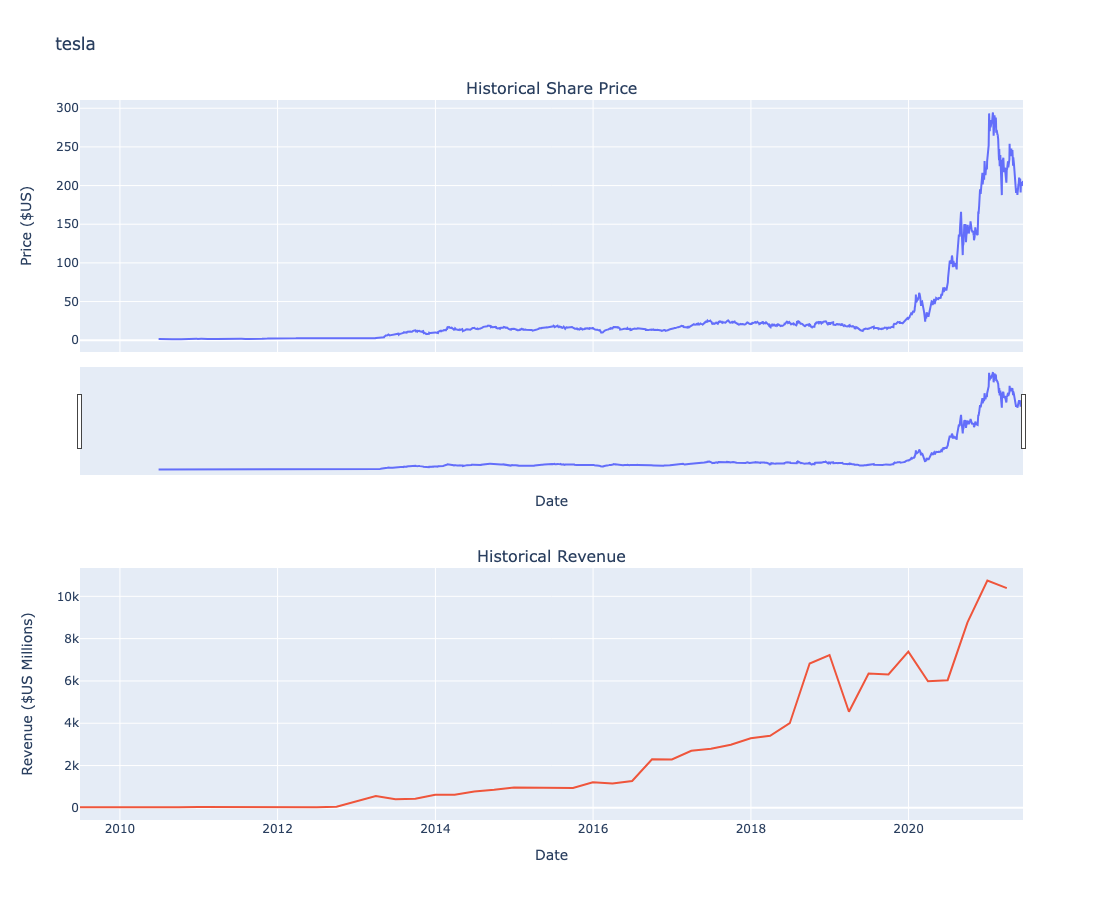

In [328]:
make_graph(tesla_data, tesla_revenue, 'tesla')

## Question 6: Plot GameStop Stock Graph

/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



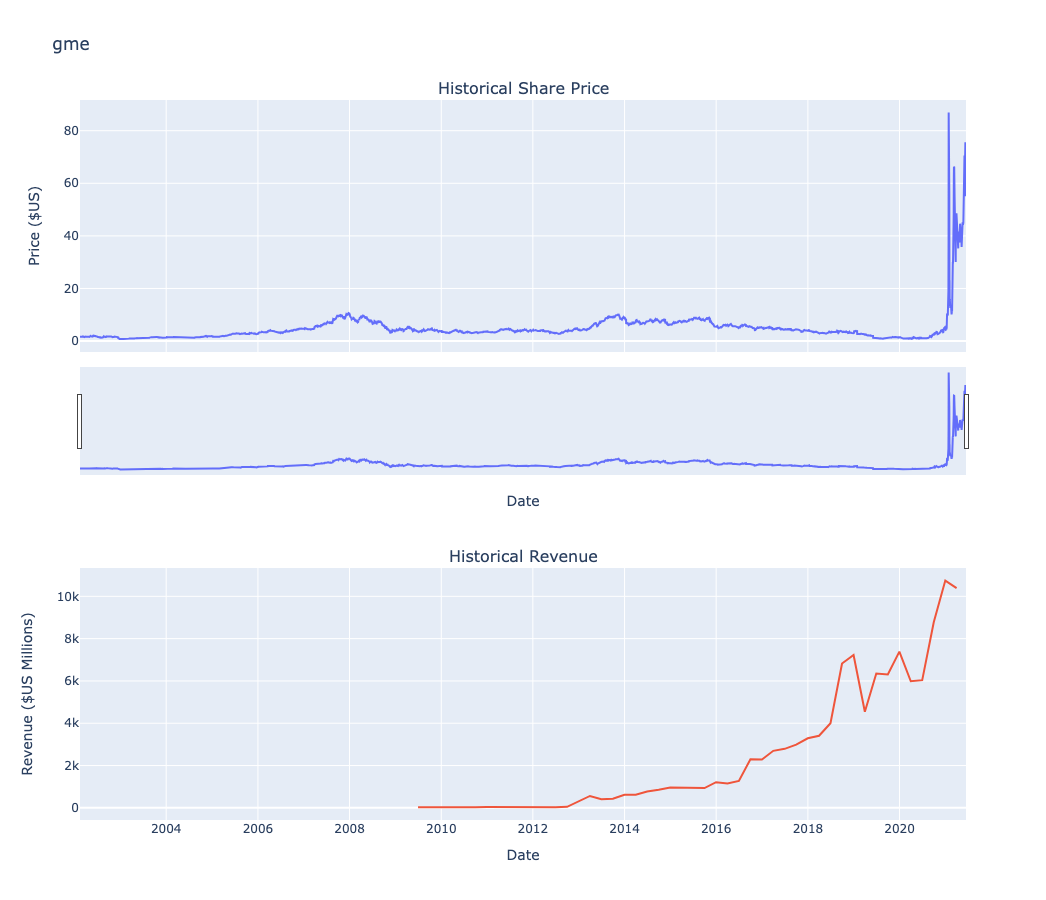

In [308]:
make_graph(gme_data, gme_revenue, "gme")